In [9]:
!pip uninstall matplotlib

In [10]:
!pip install matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/c6/c8/6936e8c7b279a5abac82f399d8d72ac25da530cf5f78a0e40063e492558c/matplotlib-3.9.0-cp311-cp311-win_amd64.whl.metadata
  Using cached matplotlib-3.9.0-cp311-cp311-win_amd64.whl.metadata (11 kB)
Using cached matplotlib-3.9.0-cp311-cp311-win_amd64.whl (8.0 MB)


In [11]:
# import pandas as pd
# import numpy as np
import matplotlib.pyplot as plt
# from sklearn.model_selection import StratifiedKFold
# from sklearn.preprocessing import StandardScaler
# from sklearn.svm import SVC
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [5]:
# Read Files
df = pd.read_excel('data3.xlsx')



In [7]:
# import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'gender' is your column
counts = df['Sex'].value_counts()

# Print the counts
print(counts)

# Create a pie chart
# plt.figure(figsize=(10,6))
# plt.pie(counts, labels = counts.index, autopct='%1.1f%%')
# plt.title('Gender Distribution')
# plt.show()


Sex
1    1217
0     907
2      26
Name: count, dtype: int64


In [ ]:
df.head()

# Separate the features (X) and target variable (y)
X = df.drop('DroppedOut', axis=1)
y = df['DroppedOut']
# Convert y to a numpy array
y = np.array(y)

# Perform z-score normalization on the features 
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

In [28]:
# Lists to store the metrics of each fold
confusion_matrices = []
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Perform stratified K-fold cross-validation with 8 folds
skf = StratifiedKFold(n_splits=8)

# Train a Gradient Boosting classifier on each fold
gb = GradientBoostingClassifier()

for train_index, test_index in skf.split(X_normalized, y):
    X_train, X_test = X_normalized[train_index], X_normalized[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Train the Gradient Boosting classifier
    gb.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = gb.predict(X_test)
    
    # Compute the confusion matrix and store it in the list
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)
    
    # Compute the metrics and store them in the lists
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred, average='weighted'))
    recalls.append(recall_score(y_test, y_pred, average='weighted'))
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

In [29]:
# Print the confusion matrices
for i, cm in enumerate(confusion_matrices):
    print(f"Confusion matrix for fold {i+1}:\n", cm)
    
# Compute the macro averages
macro_precision = precision_score(y_test, y_pred, average='macro')
macro_recall = recall_score(y_test, y_pred, average='macro')
macro_f1 = f1_score(y_test, y_pred, average='macro')

# Print the metrics
print("Model Accuracy:", np.mean(accuracies))
print("Weighted Average Precision:", np.mean(precisions))
print("Weighted Average Recall:", np.mean(recalls))
print("Weighted Average F1-score:", np.mean(f1_scores))
print("Macro Average Precision:", macro_precision)
print("Macro Average Recall:", macro_recall)
print("Macro Average F1-score:", macro_f1)

Confusion matrix for fold 1:
 [[153  11]
 [  8  49]]
Confusion matrix for fold 2:
 [[154  10]
 [  6  51]]
Confusion matrix for fold 3:
 [[152  12]
 [ 11  46]]
Confusion matrix for fold 4:
 [[157   7]
 [  5  52]]
Confusion matrix for fold 5:
 [[155   9]
 [ 12  45]]
Confusion matrix for fold 6:
 [[154  10]
 [  9  48]]
Confusion matrix for fold 7:
 [[152  12]
 [  6  51]]
Confusion matrix for fold 8:
 [[152  12]
 [  6  50]]
Model Accuracy: 0.9173745372274784
Weighted Average Precision: 0.9190188263254208
Weighted Average Recall: 0.9173745372274784
Weighted Average F1-score: 0.9178826079457575
Macro Average Precision: 0.884238464679461
Macro Average Recall: 0.9098432055749129
Macro Average F1-score: 0.8957785030003158


In [30]:
# Get feature importances
feature_importances = gb.feature_importances_

# Create a DataFrame of features and their importances
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
features_df = features_df.sort_values('Importance', ascending=False)

# Print the feature importances
print(features_df)

                            Feature  Importance
18  ContinuousAbsenceSinceLastLogin    0.438211
26               NumPassedWorkshops    0.386640
30            AttendedSessionsCount    0.052297
24       NumOfAttemptedSLActivities    0.019593
28   NumWorkshopsWithNullPassStatus    0.016459
19         NumOfAwardedSLActivities    0.010258
0                 AgeAtregistration    0.009822
20             NumOfNewSLActivities    0.009582
17                   RegularPresent    0.009294
33         NotRecordedSessionsCount    0.008815
29        TotalNumEnrolledWorkshops    0.007473
31         NotAttendedSessionsCount    0.004873
16                   PathologyScore    0.003544
22        NumOfRejectedSLActivities    0.003426
32             ExcusedSessionsCount    0.002975
27            NumWithdrawnWorkshops    0.002913
23         NumOfWorkingSLActivities    0.002749
5                SocioeconomicScore    0.002611
25               NumFailedWorkshops    0.002012
3                      FamilyIncome    0

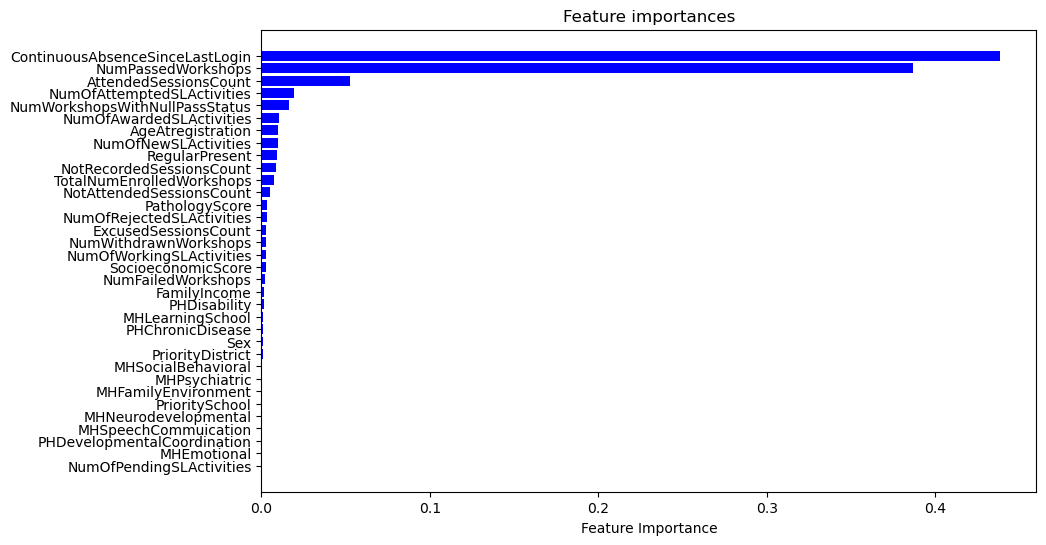

In [31]:
# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.barh(features_df['Feature'], features_df['Importance'], color='b', align='center')
plt.xlabel("Feature Importance")
plt.gca().invert_yaxis()

# Save the plot as a PNG file
plt.savefig('../visualizations/featureimp-gradient-boosting.png', bbox_inches='tight')

plt.show()

In [25]:
# Select the top 10 features
top_features = features_df['Feature'][:10]

# Select only the top features from X
X_top_features = X[top_features]

X_top_features.shape

X_normalized = scaler.fit_transform(X)

(1767, 10)

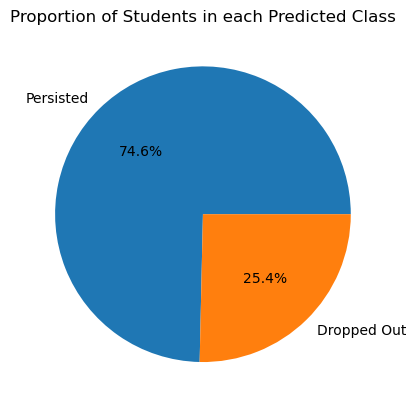

In [13]:
import matplotlib.pyplot as plt

# Count the number of students in each class
class_counts = df['DroppedOut'].value_counts()

# Change the class labels
class_counts.index = ['Persisted', 'Dropped Out']

# Create a pie chart of the counts
class_counts.plot(kind='pie', autopct='%1.1f%%')

plt.title('Proportion of Students in each Predicted Class')
plt.ylabel('')  # This line removes the y-axis label for the pie chart

# Save the figure
plt.savefig('pie_chart.png', bbox_inches='tight')

plt.show()


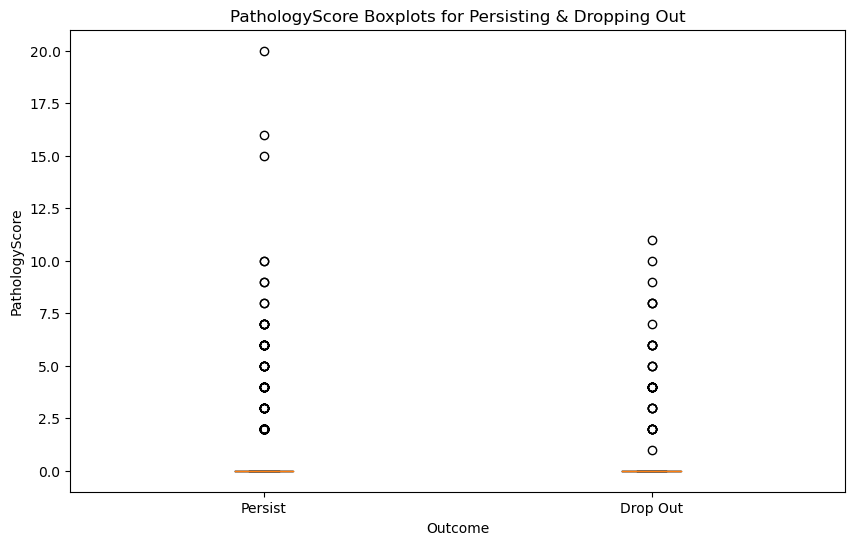

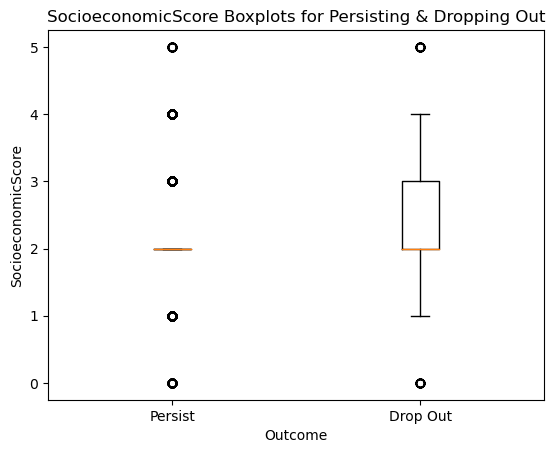

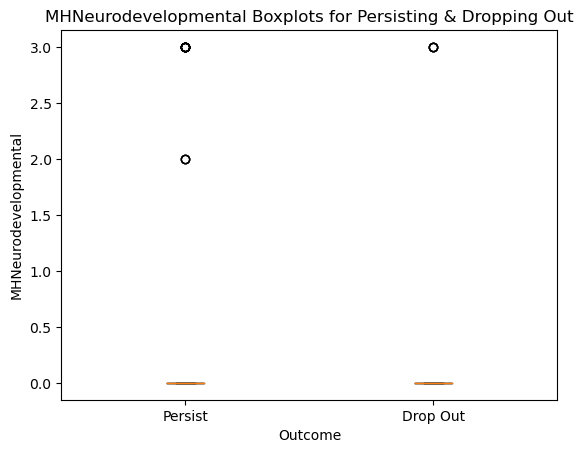

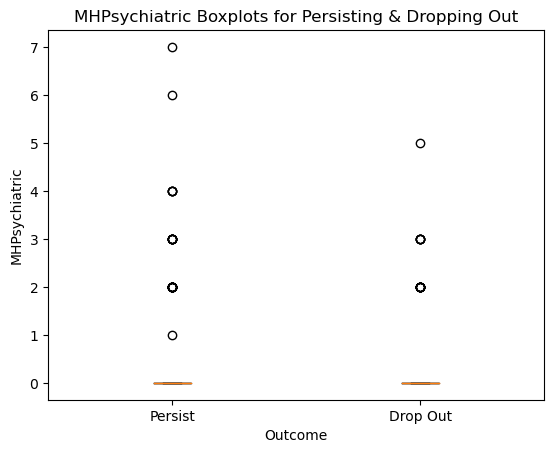

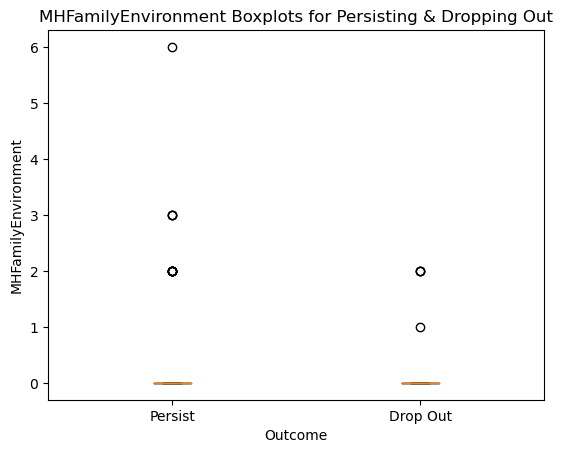

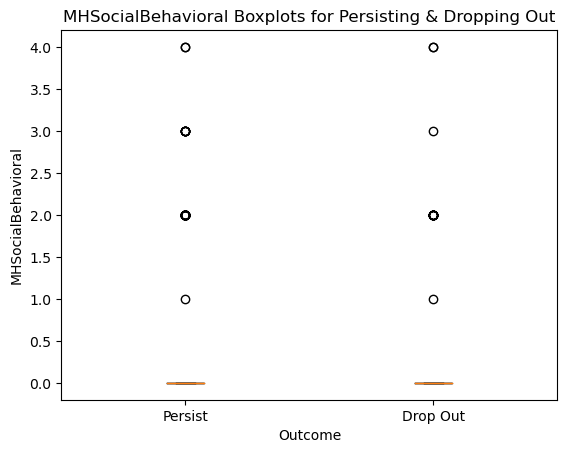

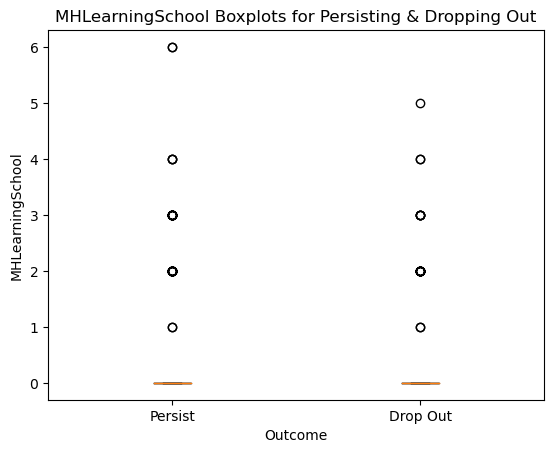

In [248]:
significant_features = ['PathologyScore', 'SocioeconomicScore', 'MHNeurodevelopmental', 'MHPsychiatric', 'MHFamilyEnvironment', 'MHSocialBehavioral', 'MHLearningSchool']

# Create boxplots of the significant features for each class
plt.figure(figsize=(10, 6))
for feature in significant_features:
    plt.boxplot([X.loc[y == 0, feature], X.loc[y == 1, feature]], labels=['Persist', 'Drop Out'])
    plt.xlabel('Outcome')
    plt.ylabel(feature)
    plt.title(f'{feature} Boxplots for Persisting & Dropping Out')
    plt.show()

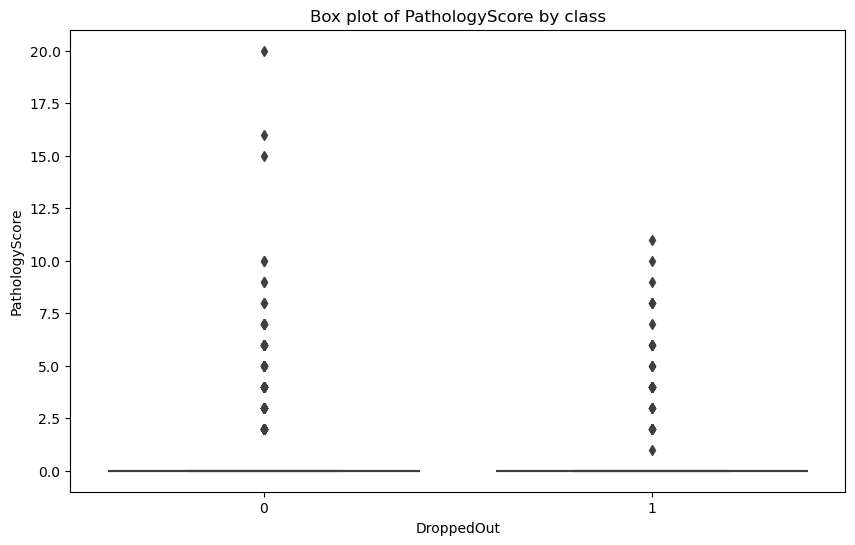

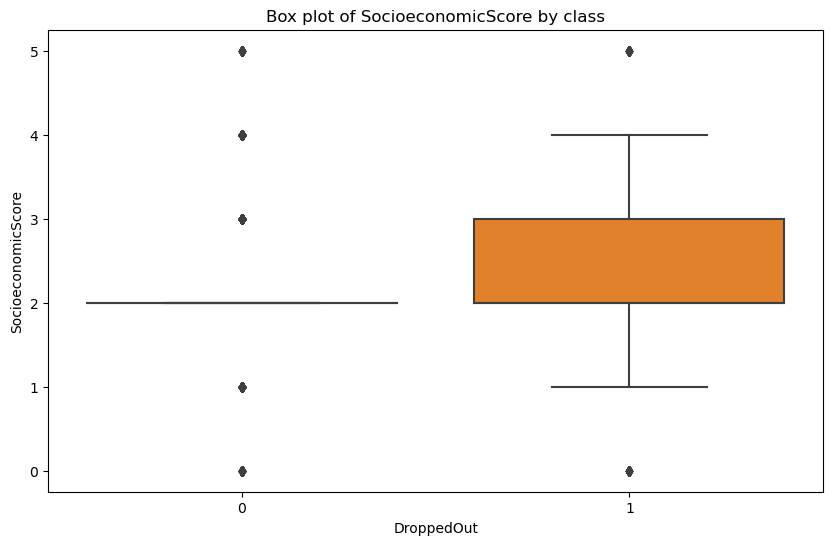

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of features to plot
features = ['PathologyScore', 'SocioeconomicScore']  # replace with your features

# For each feature, we create a separate box plot for each class
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='DroppedOut', y=feature, data=df)
    plt.title('Box plot of {} by class'.format(feature))
    plt.show()